# Side stuffs

## Run this cell if using Google Colab

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

# import os
# import sys
# from tempfile import NamedTemporaryFile
# from urllib.request import urlopen
# from urllib.parse import unquote, urlparse
# from urllib.error import HTTPError
# from zipfile import ZipFile
# import tarfile
# import shutil

# CHUNK_SIZE = 40960
# DATA_SOURCE_MAPPING = 'plant-seedlings-classification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F7880%2F862031%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240422%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240422T012524Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dc72d44995974dac6a31ba7b227aa146caf438595f804ac4af3b7d4eb91bc66007d6afcf8d84b7216fb06823597f09a8f3be99f4c906b50a701a792d56722c6183fadeaa07db5542e259b2cbf0379e13d4a0b42b2f66cf15308562a94b80f90d2b42c7a6828fe08f5126cf8bf8ed5ec15979c0ef6fa65e6eb42dd77ec71231487a6f7f37e06f16371b43f340f3ae7f7904a6f417f40be3a14b41e489a1e90905d1d14e71745308f658768e061189b61d0edc2c6d72be2d1f86981109cd0af7dee0d6662d185f709d0a31876da4ccab39447251888c15ebe2e588f126bfe516609f03f27f7822ef6cd9b1c079f5494046d71da57cf48a1d0224a97b2eee3cc0867'

# KAGGLE_INPUT_PATH='/kaggle/input'
# KAGGLE_WORKING_PATH='/kaggle/working'
# KAGGLE_SYMLINK='kaggle'

# !umount /kaggle/input/ 2> /dev/null
# shutil.rmtree('/kaggle/input', ignore_errors=True)
# os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
# os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

# try:
#   os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
# except FileExistsError:
#   pass
# try:
#   os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
# except FileExistsError:
#   pass

# for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
#     directory, download_url_encoded = data_source_mapping.split(':')
#     download_url = unquote(download_url_encoded)
#     filename = urlparse(download_url).path
#     destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
#     try:
#         with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
#             total_length = fileres.headers['content-length']
#             print(f'Downloading {directory}, {total_length} bytes compressed')
#             dl = 0
#             data = fileres.read(CHUNK_SIZE)
#             while len(data) > 0:
#                 dl += len(data)
#                 tfile.write(data)
#                 done = int(50 * dl / int(total_length))
#                 sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
#                 sys.stdout.flush()
#                 data = fileres.read(CHUNK_SIZE)
#             if filename.endswith('.zip'):
#               with ZipFile(tfile) as zfile:
#                 zfile.extractall(destination_path)
#             else:
#               with tarfile.open(tfile.name) as tarfile:
#                 tarfile.extractall(destination_path)
#             print(f'\nDownloaded and uncompressed: {directory}')
#     except HTTPError as e:
#         print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
#         continue
#     except OSError as e:
#         print(f'Failed to load {download_url} to path {destination_path}')
#         continue

# print('Data source import complete.')


## Kaggle first cell

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Install necessary libraries

In [3]:
!pip install lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.3 MB/s eta 0:00:0000:01


# Notebook content

## Inlcude standard libraries

In [4]:
# Standard libraries
import math
import os
import random
import time
import urllib.request
from functools import partial
from urllib.error import HTTPError
from types import SimpleNamespace

# PyTorch Lightning
import lightning as L
from lightning.pytorch.loggers import TensorBoardLogger

# Plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import seaborn as sns

from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image

# Libraries for ML
import numpy as np
import pandas as pd

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data
from torch.utils.data import random_split, Dataset, DataLoader
from torchvision.transforms import v2 as tforms
import torchmetrics

# Torchvision
import torchvision
from lightning.pytorch.callbacks import LearningRateMonitor, ModelCheckpoint
from torchvision import transforms
from tqdm.notebook import tqdm

## Set paths, seed for random stuffs, etc

### Kaggle path

In [5]:
# Path to the folder where the datasets are/should be downloaded (e.g. CIFAR10)
DATASET_PATH = os.environ.get("PATH_DATASETS", "/kaggle/input/plant-seedlings-classification")
TRAIN_DATASET_PATH = os.environ.get("PATH_TRAIN_DATASETS", "/kaggle/input/plant-seedlings-classification/train")
TEST_DATASET_PATH = os.environ.get("PATH_TEST_DATASETS", "/kaggle/input/plant-seedlings-classification/test")

# Path to the folder where the pretrained models are saved
CHECKPOINT_PATH = os.environ.get("PATH_CHECKPOINT", "/kaggle/working")
os.makedirs(CHECKPOINT_PATH, exist_ok=True)

num_workers = os.cpu_count()

### Google Colab path

In [6]:

# # Path to the folder where the datasets are/should be downloaded (e.g. CIFAR10)
# DATASET_PATH = os.environ.get("PATH_DATASETS", "/kaggle/input/plant-seedlings-classification")
# TRAIN_DATASET_PATH = os.environ.get("PATH_TRAIN_DATASETS", "/kaggle/input/plant-seedlings-classification/train")
# TEST_DATASET_PATH = os.environ.get("PATH_TEST_DATASETS", "/kaggle/input/plant-seedlings-classification/test")

# # Path to the folder where the pretrained models are saved
# CHECKPOINT_PATH = os.environ.get("PATH_CHECKPOINT", "./saved_models/")
# os.makedirs(CHECKPOINT_PATH, exist_ok=True)

# num_workers = os.cpu_count()

### Local Repo path

In [7]:
# # Path to the folder where the datasets are/should be downloaded (e.g. CIFAR10)
# DATASET_PATH = os.environ.get("PATH_DATASETS", "./data")
# TRAIN_DATASET_PATH = os.environ.get("PATH_TRAIN_DATASETS", "./data/train")
# TEST_DATASET_PATH = os.environ.get("PATH_TEST_DATASETS", "./data/test")

# # Path to the folder where the pretrained models are saved
# CHECKPOINT_PATH = os.environ.get("PATH_CHECKPOINT", "./saved_models/")
# os.makedirs(CHECKPOINT_PATH, exist_ok=True)

# num_workers = int(os.cpu_count()/ 2)

In [8]:
plt.set_cmap("cividis")
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg", "pdf")  # For export
matplotlib.rcParams["lines.linewidth"] = 2.0
sns.reset_orig()

# Setting the seed
seed = 13
L.seed_everything(seed)
# Ensure that all operations are deterministic on GPU (if used) for reproducibility\
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

#os.environ["CUBLAS_WORKSPACE_CONFIG"]=":4096:8"

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print("Device:", device)


INFO: Seed set to 13


Device: cuda:0


<Figure size 640x480 with 0 Axes>

In [9]:
def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

## Do data engineering

In [10]:
def make_fname_class_df(train_dir):
    classes = os.listdir(train_dir)

    file_lst = []
    class_lst = []
    class_idx_lst = []
    for i, cl in enumerate(classes):
        path = train_dir + f"/{cl}"
        file_lst = file_lst + os.listdir(path)
        class_lst = class_lst + [cl]* len(os.listdir(path))
        class_idx_lst = class_idx_lst + [i]* len(os.listdir(path))
    full_df = pd.DataFrame({"file": file_lst, "class": class_lst,\
                              "class_idx": class_idx_lst})
    return full_df

full_df = make_fname_class_df(TRAIN_DATASET_PATH)

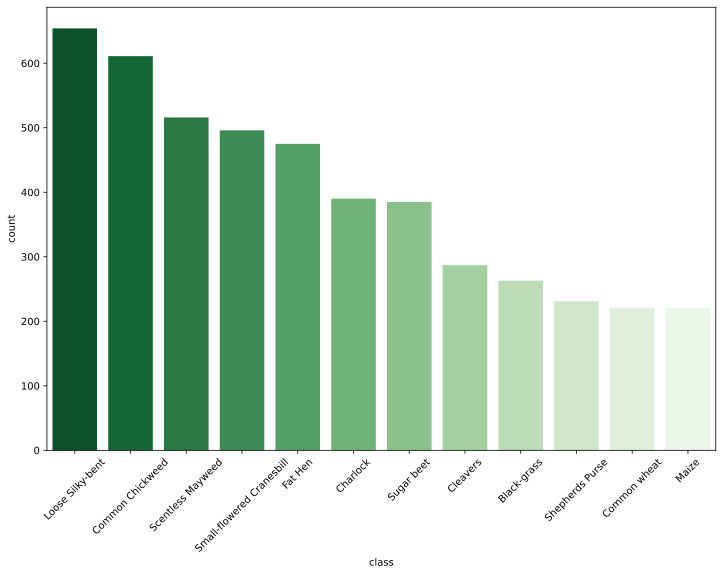

In [11]:
plt.figure(figsize=(12, 8))
g = sns.countplot(data=full_df, x="class", order=full_df['class'].value_counts().index, palette='Greens_r')
plt.xticks(rotation=45);

In [12]:
def visualize_input_images(root_dir, images_per_row=7):
    classes = os.listdir(root_dir)
    fig = plt.figure(1, figsize=(len(classes)*3, images_per_row*3))
    grid = ImageGrid(fig, 111, nrows_ncols=(len(classes), images_per_row), axes_pad=0.05)
    for (row, class_name) in enumerate(classes):
        path = root_dir + f"/{class_name}"
        image_fname_samples = random.sample(os.listdir(path),k=images_per_row)
        for img_fname, col in zip(image_fname_samples, range(images_per_row)):
            img_path = root_dir + f"/{class_name}" + f"/{img_fname}"
            img = Image.open(img_path).convert("RGB").resize((224, 224))
            grid[row*images_per_row + col].imshow(img)
            grid[row*images_per_row + col].set_axis_off()
            if col == images_per_row - 1:
                grid[row*images_per_row + col].text(250, 110, class_name, verticalalignment='bottom', horizontalalignment="left")
    fig.show()
visualize_input_images(TRAIN_DATASET_PATH)

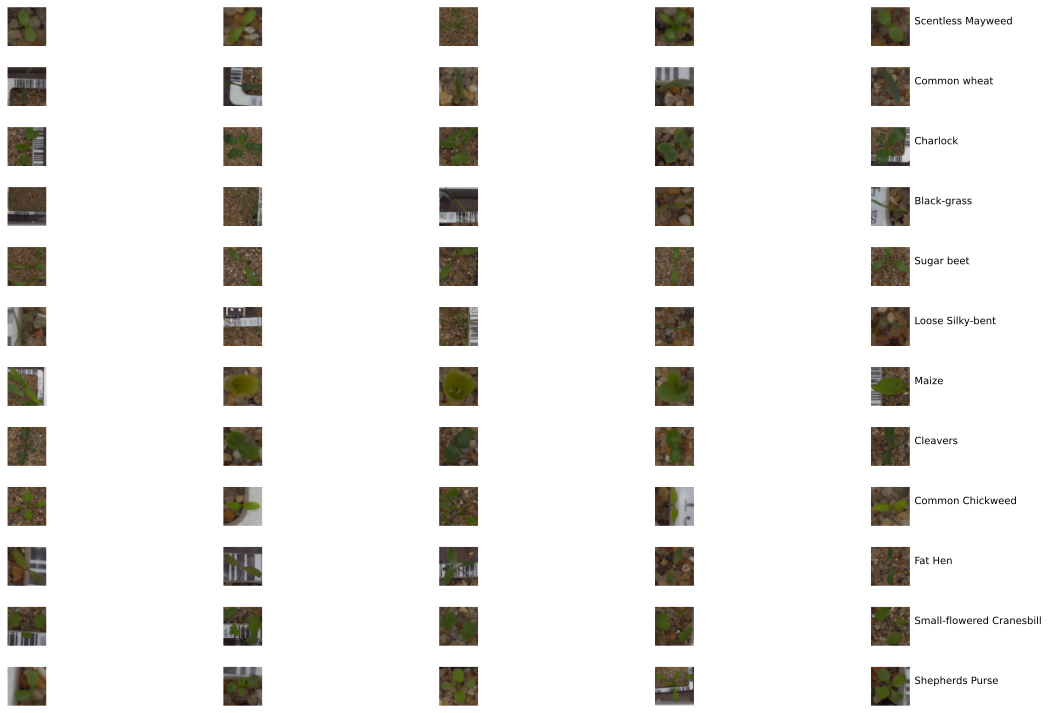

In [13]:
def visualize_input_images_2(root_dir, images_per_row=5):
    classes = os.listdir(root_dir)
    fig, axes = plt.subplots(nrows=len(classes), ncols=images_per_row, figsize=(15, 10))
    fig.tight_layout(pad=0.0)
    for (row, class_name) in enumerate(classes):
        path = root_dir + f"/{class_name}"
        image_fname_samples = random.sample(os.listdir(path),k=images_per_row)
        for img_fname, col in zip(image_fname_samples, range(images_per_row)):
            img_path = root_dir + f"/{class_name}" + f"/{img_fname}"
            img = Image.open(img_path).convert("RGB").resize((224, 224))
            axes[row][col].imshow(img)
            axes[row][col].set_axis_off()
            if col == images_per_row - 1:
                axes[row][col].text(250, 110, class_name, verticalalignment='bottom', horizontalalignment="left")
    fig.show()
visualize_input_images_2(TRAIN_DATASET_PATH)

## Create datamodule

In [14]:
class PlantTrainDataset(Dataset):

    def __init__(self, root_dir, transform=None, target_transform=None):
        self.root_dir = root_dir
        self.fname_class_df = make_fname_class_df(root_dir)
        self.transform = transform
        self.target_transform = target_transform

    # def class_to_idx(self):
    #     return {_class: i for i, _class in enumerate(self.classes)}

    # def idx_to_class(self):
    #     return dict(zip(range(len(self.classes)), self.classes))

    def __len__(self):
        return self.fname_class_df.shape[0]

    def __getitem__(self, idx):
        path = self.root_dir + f"/{self.fname_class_df.loc[self.fname_class_df.index[idx], 'class']}" \
            + f"/{self.fname_class_df.loc[self.fname_class_df.index[idx], 'file']}"
        image = Image.open(path).convert("RGB")
        target = self.fname_class_df.loc[self.fname_class_df.index[idx], "class_idx"]

        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            target = self.target_transform(target)
        return image, target

class PlantTestDataset(Dataset):

    def __init__(self, root_dir, transform=None, target_transform=None):
        self.root_dir = root_dir
        self.fname_class_df = pd.DataFrame({"file": os.listdir(root_dir)})
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return self.fname_class_df.shape[0]

    def __getitem__(self, idx):
        path = self.root_dir + f"/{self.fname_class_df.loc[self.fname_class_df.index[idx], 'file']}"
        image = Image.open(path).convert("RGB")

        if self.transform:
            image = self.transform(image)
        return image

In [15]:
def compute_mean_std(dataset, batch_size=8):
    #imgage values in [0, 255]
    rgb_values = torch.cat([img.reshape(3, -1) for img, target in dataset], dim=-1)
    rgb_values_chunks = rgb_values.split(224*224*batch_size, dim=1)
    rgb_mean_chunks = [torch.mean(chunk.float(), dim=-1) for chunk in rgb_values_chunks] #list of tensor shape (3,)
    rgb_mean = torch.mean(torch.stack(rgb_mean_chunks, dim=0), dim=0).reshape((3, 1)) #shape (3, 1)

    rgb_var_chunks = [torch.mean((chunk - rgb_mean).float()** 2, dim=-1) for chunk in rgb_values_chunks]
    rgb_std = torch.sqrt(torch.mean(torch.stack(rgb_var_chunks, dim=0), dim=0))

    return rgb_mean.squeeze()/ 255.0, rgb_std/ 255.0

In [16]:
class PlantDataModule(L.LightningDataModule):
    def __init__(self, root_dir, test_dir, batch_size):
        super().__init__()
        self.root_dir = root_dir
        self.test_dir = test_dir
        self.batch_size = batch_size
        backbone_mean, backbone_std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]

        self.transform = tforms.Compose([
            tforms.ToImage(),
            tforms.ToDtype(torch.uint8, scale=True),
            tforms.RandomAffine(degrees=10, translate=(0.2, 0.2)),
            tforms.RandomHorizontalFlip(),
            tforms.RandomVerticalFlip(),
            tforms.Resize((224, 224), antialias=True),
            tforms.ToDtype(torch.float32, scale=True),
            tforms.Normalize(backbone_mean, backbone_std)
        ])
        self.test_transform = tforms.Compose([
            tforms.ToImage(),
            tforms.ToDtype(torch.uint8, scale=True),
            tforms.Resize((224, 224), antialias=True),
            tforms.ToDtype(torch.float32, scale=True),
            tforms.Normalize(backbone_mean, backbone_std)
        ])

    def prepare_data(self):
        # download
        pass

    def setup(self, stage: str):
        if stage == "fit":
            full_dataset = PlantTrainDataset(self.root_dir,transform=self.transform)
            
            self.train_dataset, self.val_dataset = random_split(full_dataset, [0.8, 0.2],\
                generator=torch.Generator().manual_seed(seed)
            )
        if stage == "test":
            full_dataset = PlantTrainDataset(self.root_dir,transform=self.transform)
            
            _, self.test_dataset = random_split(full_dataset, [0.8, 0.2],\
                generator=torch.Generator().manual_seed(torch.initial_seed())
            )
        if stage == "predict":
            self.predict_dataset = PlantTestDataset(self.test_dir, transform=self.test_transform)

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True, drop_last=False,\
                    num_workers=num_workers, pin_memory=True, worker_init_fn=seed_worker,\
                    generator=torch.Generator().manual_seed(torch.initial_seed()), persistent_workers=True
        )

    def val_dataloader(self):
        return DataLoader(self.val_dataset, batch_size=self.batch_size, shuffle=False, drop_last=False,\
                    num_workers=num_workers, worker_init_fn=seed_worker,\
                    generator=torch.Generator().manual_seed(torch.initial_seed()), persistent_workers=True
        )

    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size, shuffle=False, drop_last=False,\
                    num_workers=num_workers, worker_init_fn=seed_worker,\
                    generator=torch.Generator().manual_seed(torch.initial_seed()), persistent_workers=True
        )

    def predict_dataloader(self):
        return DataLoader(self.predict_dataset, batch_size=self.batch_size, shuffle=False, drop_last=False,\
                    num_workers=num_workers, worker_init_fn=seed_worker,\
                    generator=torch.Generator().manual_seed(torch.initial_seed()), persistent_workers=True
        )


## Create classifier

In [43]:
class PlantSeedModule(L.LightningModule):
    def __init__(self, model_name, model_hparams, optimizer_name, optimizer_hparams, metrics_name, metrics_hparams):
        super().__init__()
        # Exports the hyperparameters to a YAML file, and create "self.hparams" namespace
        self.save_hyperparameters()
        # Create model
        self.model = create_model(model_name, model_hparams)
        # Create loss module
        self.loss_module = nn.CrossEntropyLoss()
        # Example input for visualizing the graph in Tensorboard
        self.example_input_array = torch.zeros((1, 3, 224, 224), dtype=torch.float32)

        self._configure_metrics()

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        preds = torch.argmax(outputs, dim=-1)
        loss = self.loss_module(outputs, targets)
        self.train_metrics.update(preds, targets)
        # By default logs it per step and epoch
        self.log("train_loss", loss, logger=True)
        self.log_dict(self.train_metrics, on_step=False, on_epoch=True, logger=True)

        return loss

    def validation_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        preds = torch.argmax(outputs, dim=-1)
        self.valid_metrics.update(preds, targets)
        # By default logs it per epoch
        self.log_dict(self.valid_metrics, on_step=False, on_epoch=True, logger=True)

    def test_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        preds = torch.argmax(outputs, dim=-1)
        self.test_metrics.update(preds, targets)
        # By default logs it per epoch
        self.log_dict(self.test_metrics, on_step=False, on_epoch=True, logger=True)

        # targets_np, preds_np = targets.cpu().data.numpy(), preds.cpu().data.numpy()
        # print(f"\n#################################################")
        # print(f"accuracy: {accuracy_score(targets_np, preds_np)}")
        # print(f"precision: {precision_score(targets_np, preds_np, average='micro')}")
        # print(f"recall: {recall_score(targets_np, preds_np, average='micro')}")
        # print(f"f1: {f1_score(targets_np, preds_np, average='micro')}")

    def predict_step(self, batch, batch_idx):
        inputs = batch
        outputs = self(inputs)
        return torch.argmax(outputs, dim=-1)

    def _configure_metrics(self):
        metric_lst = []
        for metric_name, metric_hprams in zip(self.hparams.metrics_name, self.hparams.metrics_hparams):
            if metric_name == "Accuracy":
                metric_lst.append(torchmetrics.Accuracy(**metric_hprams))
            elif metric_name == "Precision":
                metric_lst.append(torchmetrics.Precision(**metric_hprams))
            elif metric_name == "Recall":
                metric_lst.append(torchmetrics.Recall(**metric_hprams))
            elif metric_name == "F1Score":
                metric_lst.append(torchmetrics.F1Score(**metric_hprams))
            else:
                pass
        metrics = torchmetrics.MetricCollection(metric_lst)
        self.train_metrics = metrics.clone(prefix='train_')
        self.valid_metrics = metrics.clone(prefix='val_')
        self.test_metrics = metrics.clone(prefix='test_')

    def configure_optimizers(self):
        if self.hparams.optimizer_name == "Adam":
            # AdamW is Adam with a correct implementation of weight decay (see here
            # for details: https://arxiv.org/pdf/1711.05101.pdf)
            optimizer = optim.Adam(filter(lambda p: p.requires_grad, self.model.parameters()), **self.hparams.optimizer_hparams)
        elif self.hparams.optimizer_name == "SGD":
            optimizer = optim.SGD(filter(lambda p: p.requires_grad, self.model.parameters()), **self.hparams.optimizer_hparams)
        else:
            assert False, f'Unknown optimizer: "{self.hparams.optimizer_name}"'

        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
        return [optimizer], [scheduler]

In [44]:
model_dict = {}

def create_model(model_name, model_hparams):
    if model_name in model_dict:
        return model_dict[model_name](**model_hparams)
    else:
        assert False, f'Unknown model name "{model_name}". Available models are: {str(model_dict.keys())}'

In [59]:
class ResnetPlantModel(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.hparams = SimpleNamespace(num_classes=num_classes)
        self._create_network()
        self._init_params()

    def _create_network(self):
        backbone = torchvision.models.resnet50(weights=torchvision.models.ResNet50_Weights.DEFAULT)
        self.features = nn.Sequential(*(list(backbone.children())[:-1]))
        num_ftrs = backbone.fc.in_features
        self.classifier = torch.nn.Sequential(
                            torch.nn.Linear(num_ftrs, 128),
                            torch.nn.ReLU(),
                            torch.nn.Dropout(0.3),
                            torch.nn.Linear(128, self.hparams.num_classes)
                        )
        for param in self.features.parameters():
            param.requires_grad = False

    def _init_params(self):
        pass

    def forward(self, x):
        ftrs = self.features(x)
        ftrs = ftrs.view(ftrs.size(0), -1)
        y = self.classifier(ftrs)
        return y

model_dict["ResnetPlantModel"] = ResnetPlantModel

## Train classifier

In [63]:
def train_model(model_name, datamodule, max_epochs, save_name=None, **kwargs):
    """Train model.

    Args:
        model_name: Name of the model you want to run. Is used to look up the class in "model_dict"
        save_name (optional): If specified, this name will be used for creating the checkpoint and logging directory.
    """
    if save_name is None:
        save_name = model_name

    # Create a PyTorch Lightning trainer with the generation callback
    trainer = L.Trainer(
        default_root_dir=os.path.join(CHECKPOINT_PATH, save_name),  # Where to save models
        # We run on a single GPU (if possible)
        accelerator="auto",
        devices=1,
        # How many epochs to train for if no patience is set
        max_epochs=max_epochs,
        logger=TensorBoardLogger(save_dir=os.path.join(CHECKPOINT_PATH, save_name), name="logs", version="version_4"),
        callbacks=[
            ModelCheckpoint(
                #dirpath=os.path.join(CHECKPOINT_PATH, save_name),
                mode="max", monitor="val_MulticlassAccuracy", verbose=True, save_last=True, save_top_k=2, enable_version_counter=True
            ),  # Save the best checkpoint based on the maximum val_acc recorded. Saves only weights and not optimizer
            LearningRateMonitor("epoch"),
        ],  # Log learning rate every epoch
        log_every_n_steps=50,
        # profiler="simple"
    )  # In case your notebook crashes due to the progress bar, consider increasing the refresh rate
    trainer.logger._log_graph = True  # If True, we plot the computation graph in tensorboard
    trainer.logger._default_hp_metric = None  # Optional logging argument that we don't need

    # Check whether pretrained model exists. If yes, load it and skip training
    pretrained_filename = os.path.join(CHECKPOINT_PATH, save_name + ".ckpt")
    if os.path.isfile(pretrained_filename):
        print(f"Found pretrained model at {pretrained_filename}, loading...")
        # Automatically loads the model with the saved hyperparameters
        model = PlantSeedModule.load_from_checkpoint(pretrained_filename)
    else:
        L.seed_everything(seed)  # To be reproducible
        model = PlantSeedModule(model_name=model_name, **kwargs)
        trainer.fit(model, datamodule=datamodule, ckpt_path="last")
        model = PlantSeedModule.load_from_checkpoint(
            trainer.checkpoint_callback.best_model_path
        )  # Load best checkpoint after training

    # Test best model on validation and test set
    test_result = trainer.test(model, datamodule=datamodule, verbose=True)
    #result = {"test": test_result[0]["test_Accuracy"]}

    return trainer, model, test_result

In [64]:
batch_size = 64
plantdata = PlantDataModule(TRAIN_DATASET_PATH, TEST_DATASET_PATH, batch_size)

In [65]:
trainer, model, test_result = train_model(
    model_name="ResnetPlantModel",
    datamodule=plantdata,
    max_epochs=20,
    model_hparams={"num_classes": 12},
    optimizer_name="Adam",
    optimizer_hparams={"lr": 3e-3, "weight_decay": 1e-4},
    metrics_name= ["Accuracy", "Precision", "Recall", "F1Score"],
    metrics_hparams= [
        {"task": "multiclass", "num_classes": 12, "average": "macro"},
        {"task": "multiclass", "num_classes": 12, "average": "macro"},
        {"task": "multiclass", "num_classes": 12, "average": "macro"},
        {"task": "multiclass", "num_classes": 12, "average": "macro"}
    ]
)

INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO: Seed set to 13
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name          | Type             | Params | In sizes         | Out sizes
----------------------------------------------------------------------------------
0 | model         | ResnetPlantModel | 23.8 M | [1, 3, 224, 224] | [1, 12]  
1 | loss_module   | CrossEntropyLoss | 0      | ?                | ?        
2 | train_metrics | MetricCollection | 0      | ?                | ?        
3 | valid_metrics | MetricCollection | 0      | ?                | ?        
4 | test_metrics  | MetricCollection | 0      | ?                | ?        
----------------------------------------------------------------------------------
263 K     Trainable params
23.5 M    Non-trainable params
23.8 M    Total params
95.087    Total estimated model params 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 60: 'val_MulticlassAccuracy' reached 0.63558 (best 0.63558), saving model to '/kaggle/working/ResnetPlantModel/logs/version_4/checkpoints/epoch=0-step=60.ckpt' as top 2


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 120: 'val_MulticlassAccuracy' reached 0.75831 (best 0.75831), saving model to '/kaggle/working/ResnetPlantModel/logs/version_4/checkpoints/epoch=1-step=120.ckpt' as top 2


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 2, global step 180: 'val_MulticlassAccuracy' reached 0.76086 (best 0.76086), saving model to '/kaggle/working/ResnetPlantModel/logs/version_4/checkpoints/epoch=2-step=180.ckpt' as top 2


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 3, global step 240: 'val_MulticlassAccuracy' reached 0.76738 (best 0.76738), saving model to '/kaggle/working/ResnetPlantModel/logs/version_4/checkpoints/epoch=3-step=240.ckpt' as top 2


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 4, global step 300: 'val_MulticlassAccuracy' reached 0.79480 (best 0.79480), saving model to '/kaggle/working/ResnetPlantModel/logs/version_4/checkpoints/epoch=4-step=300.ckpt' as top 2


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 5, global step 360: 'val_MulticlassAccuracy' reached 0.81105 (best 0.81105), saving model to '/kaggle/working/ResnetPlantModel/logs/version_4/checkpoints/epoch=5-step=360.ckpt' as top 2


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 6, global step 420: 'val_MulticlassAccuracy' reached 0.82638 (best 0.82638), saving model to '/kaggle/working/ResnetPlantModel/logs/version_4/checkpoints/epoch=6-step=420.ckpt' as top 2


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 7, global step 480: 'val_MulticlassAccuracy' reached 0.81798 (best 0.82638), saving model to '/kaggle/working/ResnetPlantModel/logs/version_4/checkpoints/epoch=7-step=480.ckpt' as top 2


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 8, global step 540: 'val_MulticlassAccuracy' was not in top 2


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 9, global step 600: 'val_MulticlassAccuracy' reached 0.82812 (best 0.82812), saving model to '/kaggle/working/ResnetPlantModel/logs/version_4/checkpoints/epoch=9-step=600.ckpt' as top 2


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 10, global step 660: 'val_MulticlassAccuracy' was not in top 2


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 11, global step 720: 'val_MulticlassAccuracy' was not in top 2


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 12, global step 780: 'val_MulticlassAccuracy' reached 0.83260 (best 0.83260), saving model to '/kaggle/working/ResnetPlantModel/logs/version_4/checkpoints/epoch=12-step=780.ckpt' as top 2


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 13, global step 840: 'val_MulticlassAccuracy' was not in top 2


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 14, global step 900: 'val_MulticlassAccuracy' was not in top 2


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 15, global step 960: 'val_MulticlassAccuracy' reached 0.83647 (best 0.83647), saving model to '/kaggle/working/ResnetPlantModel/logs/version_4/checkpoints/epoch=15-step=960.ckpt' as top 2


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 16, global step 1020: 'val_MulticlassAccuracy' was not in top 2


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 17, global step 1080: 'val_MulticlassAccuracy' was not in top 2


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 18, global step 1140: 'val_MulticlassAccuracy' was not in top 2


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 19, global step 1200: 'val_MulticlassAccuracy' was not in top 2
INFO: `Trainer.fit` stopped: `max_epochs=20` reached.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  test_MulticlassAccuracy  │    0.8420802354812622     │
│  test_MulticlassF1Score   │    0.8504135012626648     │
│ test_MulticlassPrecision  │    0.8650362491607666     │
│   test_MulticlassRecall   │    0.8420802354812622     │
└───────────────────────────┴───────────────────────────┘

In [ ]:
# # Load tensorboard in notebook and create simple UI to show/hide
# %load_ext tensorboard
# %tensorboard --logdir /saved_models/TLEfficientnet/logs/

# import IPython

# display(IPython.display.HTML('''
# <button id='open_tb'>Open TensorBoard</button>
# <button id='hide_tb'>Hide TensorBoard</button>
# <script>document.querySelector('#open_tb').onclick = () => { window.open(document.querySelector('iframe').src, "__blank") }
#         document.querySelector('#hide_tb').onclick = () => { document.querySelector('iframe').style.display = "none" }</script>'''))

## Make prediction

In [66]:
preds = trainer.predict(model, plantdata)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

In [67]:
classes = os.listdir(TRAIN_DATASET_PATH)
# idx_to_class_dict = {i: _class for i, _class in enumerate(classes)}
species = np.vectorize(lambda idx: classes[idx])(torch.cat(preds, 0))

## Create submission file

In [68]:
# import os 
# import numpy as np
# import pandas as pd
# TEST_DATASET_PATH = os.environ.get("PATH_TEST_DATASETS", "/kaggle/input/plant-seedlings-classification/test")
# species = ["Charklock"] * len(os.listdir(TEST_DATASET_PATH))

In [70]:
submission = pd.DataFrame({"file": os.listdir(TEST_DATASET_PATH),
                         "species": species})

submission.to_csv("submission.csv", index=False, header=True)

In [71]:
submission

file           species
0    fd87b36ae.png  Loose Silky-bent
1    0e8492cb1.png        Sugar beet
2    8d6acbe9b.png  Common Chickweed
3    54b3afd58.png          Cleavers
4    6049234e6.png           Fat Hen
..             ...               ...
789  4c7838de4.png  Common Chickweed
790  fda39e16f.png  Loose Silky-bent
791  da4ed3a28.png          Charlock
792  a83820a2c.png        Sugar beet
793  e4a76885b.png             Maize

[794 rows x 2 columns]